# Model Comparison Tutorial

This tutorial will demonstrate how to compare goodness of fit between faulted models.

**Files needed:** 

Experimental: ```expt_XRD.txt```

Unfaulted supercell: ```(001)_n1000_UF.txt```

Supercell models with $S1=[0, \frac{1}{4}, 0]$: ```(001)_n1000_p10_s1_4.txt```, ```(001)_n1000_p20_s1_4.txt```, ```(001)_n1000_p30_s1_4.txt```, and ```(001)_n1000_p40_s1_4.txt```

Supercell models with $S2=[0, \frac{1}{3}, 0]$: ```(001)_n1000_p10_s1_3.txt```, ```(001)_n1000_p20_s1_3.txt```, ```(001)_n1000_p30_s1_3.txt```, and ```(001)_n1000_p40_s1_3.txt```

Supercell models with $S3=[0, \frac{2}{5}, 0]$: ```(001)_n1000_p10_s2_5.txt```, ```(001)_n1000_p20_s2_5.txt```, ```(001)_n1000_p30_s2_5.txt```, and ```(001)_n1000_p40_s2_5.txt```

Difference curves with experimental data: ```UF_diff.txt```, ```S1_p10_diff.txt```, ```S1_p20_diff.txt```, ```S1_p30_diff.txt```, ```S1_p40_diff.txt```, ```S2_p10_diff.txt```, ```S2_p20_diff.txt```, ```S2_p30_diff.txt```, ```S2_p40_diff.txt```, ```S3_p10_diff.txt```, ```S3_p20_diff.txt```, ```S3_p30_diff.txt```, and ```S3_p40_diff.txt```

Supercell ($N=1000$) model with a given stacking vector was simulated with stacking probabilities of 10%, 20%, 30%, and 40%

In [1]:
# import PyFaults package
import pyfaults as pf
import numpy as np

import matplotlib.ticker as ticker
from matplotlib.pyplot import rc
rc("text", usetex=True)
rc("font", **{"family":"sans-serif","sans-serif":["Helvetica"]},size="14")
rc("text.latex",preamble=r"\usepackage{sfmath}")

In [2]:
# set file directories
filePath = "C:/Users/sincl/packages/pyfaults/pyfaults/tutorials/files/"
savePath = "C:/Users/sincl/packages/pyfaults/pyfaults/tutorials/outputs/"

In [3]:
# import data (previously simulated)

# instrument wavelength
wl = 0.459744

# experimental
expt_tt, expt_ints = pf.importSim(filePath, "expt_XRD")
expt_Q = pf.tt_to_q(expt_tt, wl)

# unfaulted supercell
UF_Q, UF_ints = pf.importSim(filePath, "(001)_n1000_UF")

# faulted by S1 = (0, 1/4, 0)
s1_p10_Q, s1_p10_ints = pf.importSim(filePath, "(001)_n1000_p10_s1_4")
s1_p20_Q, s1_p20_ints = pf.importSim(filePath, "(001)_n1000_p20_s1_4")
s1_p30_Q, s1_p30_ints = pf.importSim(filePath, "(001)_n1000_p30_s1_4")
s1_p40_Q, s1_p40_ints = pf.importSim(filePath, "(001)_n1000_p40_s1_4")

# faulted by S2 = (0, 1/3, 0)
s2_p10_Q, s2_p10_ints = pf.importSim(filePath, "(001)_n1000_p10_s1_3")
s2_p20_Q, s2_p20_ints = pf.importSim(filePath, "(001)_n1000_p20_s1_3")
s2_p30_Q, s2_p30_ints = pf.importSim(filePath, "(001)_n1000_p30_s1_3")
s2_p40_Q, s2_p40_ints = pf.importSim(filePath, "(001)_n1000_p40_s1_3")

# faulted by S3 = (0, 2/5, 0)
s3_p10_Q, s3_p10_ints = pf.importSim(filePath, "(001)_n1000_p10_s2_5")
s3_p20_Q, s3_p20_ints = pf.importSim(filePath, "(001)_n1000_p20_s2_5")
s3_p30_Q, s3_p30_ints = pf.importSim(filePath, "(001)_n1000_p30_s2_5")
s3_p40_Q, s3_p40_ints = pf.importSim(filePath, "(001)_n1000_p40_s2_5")

In [4]:
# normalize intensity data

# experimental
expt_norm = pf.plotXRD.norm(expt_ints)
expt_min = np.min(expt_norm)

# unfaulted supercell
UF_norm = pf.plotXRD.norm(UF_ints)

# faulted by S1 = (0, 1/4, 0)
s1_p10_norm = pf.plotXRD.norm(s1_p10_ints)
s1_p20_norm = pf.plotXRD.norm(s1_p20_ints)
s1_p30_norm = pf.plotXRD.norm(s1_p30_ints)
s1_p40_norm = pf.plotXRD.norm(s1_p40_ints)

# faulted by S2 = (0, 1/3, 0)
s2_p10_norm = pf.plotXRD.norm(s2_p10_ints)
s2_p20_norm = pf.plotXRD.norm(s2_p20_ints)
s2_p30_norm = pf.plotXRD.norm(s2_p30_ints)
s2_p40_norm = pf.plotXRD.norm(s2_p40_ints)

# faulted by S3 = (0, 2/5, 0)
s3_p10_norm = pf.plotXRD.norm(s1_p10_ints)
s3_p20_norm = pf.plotXRD.norm(s1_p20_ints)
s3_p30_norm = pf.plotXRD.norm(s1_p30_ints)
s3_p40_norm = pf.plotXRD.norm(s1_p40_ints)

In [8]:
# import difference curves (previously calculated)
diffPath = "C:/Users/sincl/packages/pyfaults/pyfaults/tutorials/files/diffCurves/"

# experimental vs unfaulted
UF_diffQ, UF_diffInts = pf.importSim(diffPath, "UF_diff")

# experimental vs S1
S1_p10_diffQ, S1_p10_diffInts = pf.importSim(diffPath, "S1_p10_diff")
S1_p20_diffQ, S1_p20_diffInts = pf.importSim(diffPath, "S1_p20_diff")
S1_p30_diffQ, S1_p30_diffInts = pf.importSim(diffPath, "S1_p30_diff")
S1_p40_diffQ, S1_p40_diffInts = pf.importSim(diffPath, "S1_p40_diff")

# experimental vs S2
S2_p10_diffQ, S1_p10_diffInts = pf.importSim(diffPath, "S2_p10_diff")
S2_p20_diffQ, S2_p20_diffInts = pf.importSim(diffPath, "S2_p20_diff")
S2_p30_diffQ, S2_p30_diffInts = pf.importSim(diffPath, "S2_p30_diff")
S2_p40_diffQ, S2_p40_diffInts = pf.importSim(diffPath, "S2_p40_diff")

# experimental vs S3
S3_p10_diffQ, S3_p10_diffInts = pf.importSim(diffPath, "S3_p10_diff")
S3_p20_diffQ, S3_p20_diffInts = pf.importSim(diffPath, "S3_p20_diff")
S3_p30_diffQ, S3_p30_diffInts = pf.importSim(diffPath, "S3_p30_diff")
S3_p40_diffQ, S3_p40_diffInts = pf.importSim(diffPath, "S3_p40_diff")

In [9]:
# create probability labels
probList = ["Unfaulted", r"$P=10\%$", r"$P=20\%$", r"$P=30\%$", r"$P=40\%$"]

Text(0.5, 1.05, 'Li$_3$ScCl$_6$, (001) faulted by $\\vec{S} = \\left[ 0, \\frac{1}{4}, 0 \\right]$')

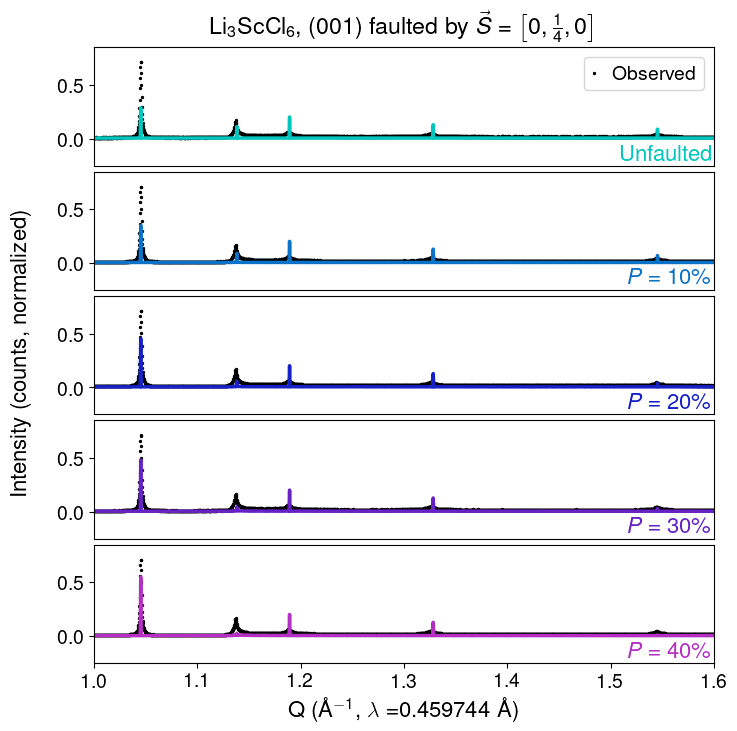

In [10]:
# created stacked plot of S1 models
S1_qVals = [UF_Q, s1_p10_Q, s1_p20_Q, s1_p30_Q, s1_p40_Q]
S1_intsVals = [UF_norm, s1_p10_norm, s1_p20_norm, s1_p30_norm, s1_p40_norm]
S1_xLim = (1.0, 1.6)
S1_yLim = (-0.25, 0.85)

S1_stack = pf.plotXRD.exptStackedPlot(5, [expt_Q, expt_norm], S1_qVals, S1_intsVals, S1_xLim, S1_yLim, wl, labels=probList,
                                     labelOffsets=(0, -0.05), normalized=True)

S1_stack[0].set_title(r"Li$_3$ScCl$_6$, (001) faulted by $\vec{S} = \left[ 0, \frac{1}{4}, 0 \right]$", y=1.05)

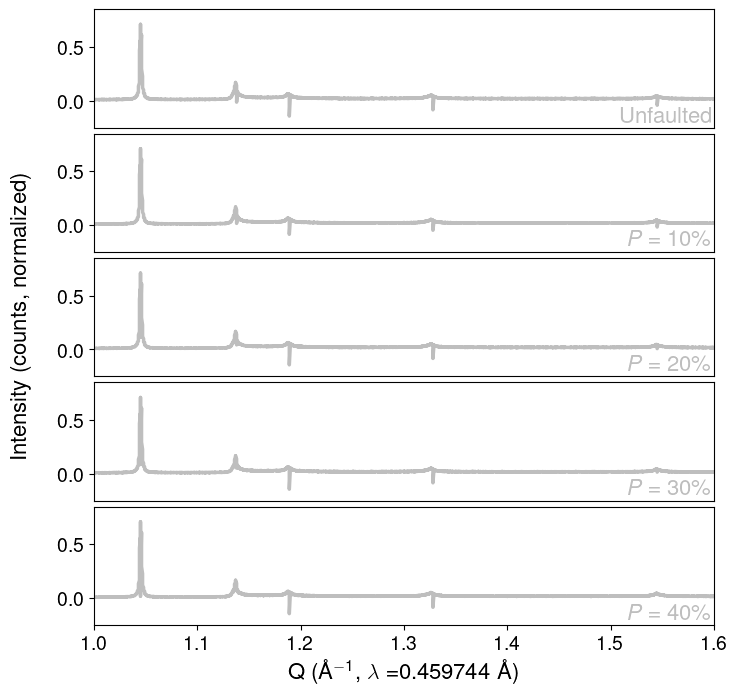

In [11]:
# create stacked plot of expt vs S1 model differences

S1_diffQ = [UF_diffQ, S1_p10_diffQ, S1_p20_diffQ, S1_p30_diffQ, S1_p40_diffQ]
S1_diffInts = [UF_diffInts, S1_p10_diffInts, S1_p20_diffInts, S1_p30_diffInts, S1_p40_diffInts]

S1_diffStack = pf.plotXRD.stackedPlot(5, S1_diffQ, S1_diffInts, S1_xLim, S1_yLim, wl, gradient=["#BEBEBE", "#BEBEBE"], 
                                     labels=probList, labelOffsets=(0, -0.05), normalized=True)

In [12]:
# calculate difference of differences (unfaulted vs faulted models)

# unfaulted vs S1 models
S1_p10_fitDiff = UF_norm - s1_p10_norm
S1_p20_fitDiff = UF_norm - s1_p20_norm
S1_p30_fitDiff = UF_norm - s1_p30_norm
S1_p40_fitDiff = UF_norm - s1_p40_norm

# unfaulted vs S2 models
S2_p10_fitDiff = UF_norm - s2_p10_norm
S2_p20_fitDiff = UF_norm - s2_p20_norm
S2_p30_fitDiff = UF_norm - s2_p30_norm
S2_p40_fitDiff = UF_norm - s2_p40_norm

# unfaulted vs S1 models
S3_p10_fitDiff = UF_norm - s3_p10_norm
S3_p20_fitDiff = UF_norm - s3_p20_norm
S3_p30_fitDiff = UF_norm - s3_p30_norm
S3_p40_fitDiff = UF_norm - s3_p40_norm

Negative intensity in Diff$_{\mathrm{UF}} - $ Diff$_{\mathrm{FLT}}$ indicates the faulted model is a better fit for that particular reflection

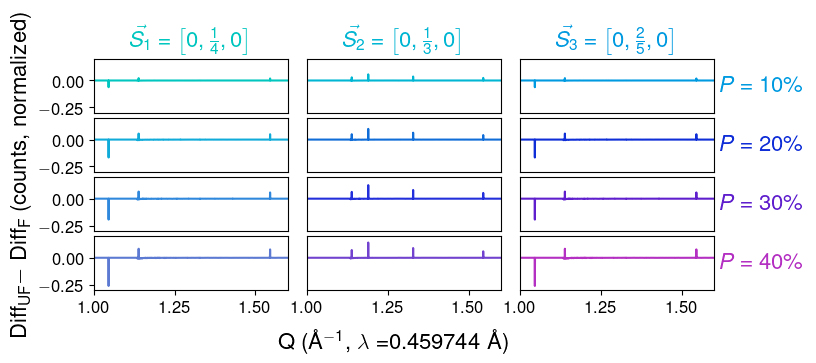

In [29]:
# plot fit comparisons
fitDiffQ = UF_Q

fitDiffInts = [[S1_p10_fitDiff, S2_p10_fitDiff, S3_p10_fitDiff], 
               [S1_p20_fitDiff, S2_p20_fitDiff, S3_p20_fitDiff], 
               [S1_p30_fitDiff, S2_p30_fitDiff, S3_p30_fitDiff], 
               [S1_p40_fitDiff, S2_p40_fitDiff, S3_p40_fitDiff]]

xLims = [(1.0, 1.6), (1.0, 1.6), (1.0, 1.6)]

rowLabels = [r"$P=10\%$", r"$P=20\%$", r"$P=30\%$", r"$P=40\%$"]

colLabels = [r"$\vec{S_1} = \left[ 0, \frac{1}{4}, 0 \right]$",
            r"$\vec{S_2} = \left[ 0, \frac{1}{3}, 0 \right]$",
            r"$\vec{S_3} = \left[ 0, \frac{2}{5}, 0 \right]$"]

fitDiffs = pf.plotXRD.fitCompare(4, 3, fitDiffQ, fitDiffInts, xLims, (-0.3, 0.2), wl, rowLabels, colLabels, 
                                 rowLabelAdj=0.02, colLabelAdj=0.05, xLabelAdj=-0.1, yLabelAdj=0.02, normalized=True)

for i in range(3):
    pf.plotXRD.setTickSpacing(fitDiffs[-1][i], "x", 0.25)
    fitDiffs[-1][i].tick_params(labelsize="12")
for i in range(4):
    pf.plotXRD.setTickSpacing(fitDiffs[i][0], "y", 0.25)
    fitDiffs[i][0].tick_params(labelsize="12")